In [22]:
ll

total 7192124
-rw-rw-r-- 1 abhimvp  543701582 Feb 23 20:30  AMiner-Author.txt
-rw-rw-r-- 1 abhimvp   75424417 Feb 23 20:30  AMiner-Coauthor.txt
-rw-rw-r-- 1 abhimvp 2178552215 Feb 23 20:35  AMiner-Paper.txt
-rw-rw-r-- 1 abhimvp       6446 Mar 22 17:30 'Co-Auth example.ipynb'
-rw-rw-r-- 1 abhimvp      39895 Mar 22 17:35  Eigen_Final_networkx.ipynb
-rw-rw-r-- 1 abhimvp         59 Mar 12 17:20  a.sage
-rw-rw-r-- 1 abhimvp    5437789 Mar 16 07:57  abrakadabra-Copy1.ipynb
-rw-rw-r-- 1 abhimvp   19078737 Mar 22 17:28  abrakadabra-Copy2.ipynb
-rw-rw-r-- 1 abhimvp      32058 Mar 21 12:44  abrakadabra.ipynb
-rw-rw-r-- 1 abhimvp  185735199 Mar  5 18:20  author.csv
-rw-rw-r-- 1 abhimvp     370138 Mar 12 17:20  b.sage
-rw-rw-r-- 1 abhimvp        137 Mar  1 15:40  centrality_results.txt
-rw-rw-r-- 1 abhimvp      45581 Mar  5 18:59  cleaning.ipynb
-rw-rw-r-- 1 abhimvp      39793 Mar 22 17:31  coauth-layer.ipynb
-rw-rw-r-- 1 abhimvp   51478539 Mar  5 18:58  coauthor.csv
-rw-rw-r-- 1 abhimvp   8219750

In [23]:
import pandas as pd 

In [24]:
data=pd.read_csv('your_output_file.csv')

In [25]:
x=data[['community','value']]

In [26]:
y=data[data['value']>1500]

In [27]:
y

,attribute,value,community,cluster
0,key1,5593.0,55.0,-1
1,key2,5071.0,50.0,-1
2,key3,5046.0,50.0,-1
3,key4,4769.0,47.0,-1
4,key5,4137.0,41.0,-1
...,...,...,...,...
110,key111,1515.0,15.0,-1
111,key112,1510.0,15.0,-1
112,key113,1509.0,15.0,-1
113,key114,1506.0,15.0,-1


In [28]:
from tqdm import *
f1 =open("output1.txt", "r").read()
arr = []
for i in tqdm(f1.split("\n\n")):
    arr.append(i.split("\n"))
arr = arr[:-1]
brr=arr[:]
for i in range(len(brr)):
    for j in range(5, 8):
        brr[i][j] = brr[i][j].split()
        brr[i][j] = brr[i][j][0] + ":" + brr[i][j][1]
#d = {#arr[i][0]:[arr[i][5],arr[i][6],arr[i][7]]}
d = {}
for i in range(len(brr)):
    d[brr[i][0]] = [brr[i][5], brr[i][6], brr[i][7], brr[i][2]]
for i in d:
    d[i][0] = d[i][0].split(":")
    d[i][1] = d[i][1].split(":")
    d[i][2] = d[i][2].split(":")
    k = d[i][-1].split(" ")
    d[i] = {
        d[i][0][0]: float(d[i][0][1]),
        d[i][1][0]: float(d[i][1][1]),
        d[i][2][0]: float(d[i][2][1]),
        k[0]: " ".join(k[i] for i in range(1, len(k))),
    }
g={}
for i in d:
    g[i] = {
        "attr_sum": (5*d[i]['#hi'] + d[i]['#pi'] + d[i]['#upi'])//3,
        "#a": d[i]["#a"],
    }
k = sorted(g.items(), key=lambda x: x[1]["attr_sum"], reverse=True)
x=k[:10000]

100%|█████████████████████████████████████████████| 532355/532355 [00:01<00:00, 316313.88it/s]


In [29]:
x[0]

('#index 1154038',
 {'attr_sum': 5593.0,
  '#a': 'New South Wales Institute of Technology, Sydney, Australia;Rand Corporation, Santa Monica, CA;<i>Basser Department of Computer Science, University of Sydney, Sydney, Australia 2006</i>. <rfc822>QUINLAN@CS.SU.OZ.AU</rfc822>;University of Washington, Computer Science Group, Seattle, Washington;Executive Director, RuleQuest Research Party Limited, Sydney, Australia;Computer Science Department, CarnegieMellon University, Pittsburgh, Pennsylvania;School of Computing Sciences, New South Wales Institute of Technology, Sydney, Australia and Artificial Intelligence Laboratory, Massachusetts Institute of Technology, Cambridge, MA'})

In [30]:
ind_dic={}
for i in x:
    if i[1]['attr_sum'] in y['value'].values:
        ind_dic[i[0]]=i[1]['attr_sum']
                            

## Linking 

In [31]:
ls

 AMiner-Author.txt            kmeans_clustering_results.csv
 AMiner-Coauthor.txt          layers-Copy1.ipynb
 AMiner-Paper.txt             layers.ipynb
'Co-Auth example.ipynb'       linkage_matrix.csv
 Eigen_Final_networkx.ipynb   new-Copy1.ipynb
 a.sage                       new.ipynb
 abrakadabra-Copy1.ipynb      nltk_data/
 abrakadabra-Copy2.ipynb      output1.txt
 abrakadabra.ipynb            output2.txt
 author.csv                   output3.txt
 b.sage                       paper.txt
 centrality_results.txt       plotly.png
 cleaning.ipynb               plotly_x.png
 coauth-layer.ipynb           plotly_y.png
 coauthor.csv                 plotly_z.png
 fullpaper.csv                simiii.txt
 g                            similar.csv
 jaffa/                       your_output_file.csv


In [32]:
def blocks(array):
    return [array[i : i + 3] for i in range(0, len(array), 3)]

In [33]:
f=open('output2.txt').read()
f = "".join(f)
f = f.split()
lp = blocks(f)

In [34]:
lp[0]

['#522324', '1034146', '1']

In [35]:
for i in lp :
    i[0]='#index '+i[0][1:]
    i[1]='#index '+i[1]

In [36]:
import itertools

In [37]:
dict(itertools.islice(ind_dic.items(),2))

{'#index 1154038': 5593.0, '#index 804905': 5071.0}

In [38]:
final=[]
for i in lp :
    if i[0] in ind_dic.keys() and i[1] in ind_dic.keys():
        final.append(i)
        

In [39]:
d={}
for i in final:
    if i[0] not in d:
        d[i[0]]={i[1]:{"weight":i[2]}}
    else:
        d[i[0]][i[1]]={"weight":i[2]}

In [40]:
d

{'#index 1104146': {'#index 614533': {'weight': '2'},
  '#index 49806': {'weight': '11'},
  '#index 919673': {'weight': '9'}},
 '#index 99694': {'#index 779043': {'weight': '4'},
  '#index 561862': {'weight': '20'},
  '#index 1351625': {'weight': '7'},
  '#index 811246': {'weight': '1'}},
 '#index 801563': {'#index 337625': {'weight': '1'},
  '#index 508711': {'weight': '3'}},
 '#index 1504142': {'#index 124158': {'weight': '2'},
  '#index 404044': {'weight': '2'},
  '#index 231369': {'weight': '2'}},
 '#index 260599': {'#index 870345': {'weight': '1'},
  '#index 99694': {'weight': '1'},
  '#index 561862': {'weight': '4'},
  '#index 231369': {'weight': '5'}},
 '#index 563760': {'#index 579939': {'weight': '2'},
  '#index 583646': {'weight': '2'}},
 '#index 908286': {'#index 352005': {'weight': '2'},
  '#index 1336062': {'weight': '4'},
  '#index 1474743': {'weight': '1'},
  '#index 1087787': {'weight': '1'}},
 '#index 37571': {'#index 352005': {'weight': '3'},
  '#index 508711': {'weig

In [41]:
import networkx as nx 

In [72]:
G1=nx.from_dict_of_dicts(d)
eigen_centrality1 = nx.eigenvector_centrality(G1)

In [73]:
sorted((v, f"{c:0.2f}") for v, c in eigen_centrality1.items())

[('#index 1014021', '0.02'),
 ('#index 1081456', '0.00'),
 ('#index 1087416', '0.00'),
 ('#index 1087787', '0.04'),
 ('#index 1104146', '0.01'),
 ('#index 1114942', '0.00'),
 ('#index 1120362', '0.00'),
 ('#index 1129493', '0.04'),
 ('#index 1135876', '0.00'),
 ('#index 1139547', '0.00'),
 ('#index 1154038', '0.02'),
 ('#index 115649', '0.24'),
 ('#index 1157279', '0.03'),
 ('#index 1164918', '0.01'),
 ('#index 1170345', '0.03'),
 ('#index 1180709', '0.04'),
 ('#index 1191433', '0.02'),
 ('#index 1194519', '0.00'),
 ('#index 1218654', '0.02'),
 ('#index 1231897', '0.05'),
 ('#index 124158', '0.04'),
 ('#index 1242123', '0.00'),
 ('#index 1278552', '0.02'),
 ('#index 1336062', '0.26'),
 ('#index 1346179', '0.03'),
 ('#index 1351625', '0.29'),
 ('#index 1370463', '0.00'),
 ('#index 1415058', '0.00'),
 ('#index 1427530', '0.01'),
 ('#index 1474743', '0.06'),
 ('#index 1504142', '0.08'),
 ('#index 1513148', '0.04'),
 ('#index 1519631', '0.11'),
 ('#index 1528484', '0.13'),
 ('#index 153714

In [74]:
degree1=nx.degree_centrality(G1)

## sum_similarity


In [75]:
len(degree)==len(eigen_centrality)

True

In [76]:
sum_similarities1={}
for i in degree1:
    sum_similarities1[i]=degree1[i]+eigen_centrality1[i]

In [77]:
sum_similarities1

{'#index 1104146': 0.04483963303451015,
 '#index 99694': 0.2439313949780673,
 '#index 801563': 0.07613692657013177,
 '#index 1504142': 0.1360167486070247,
 '#index 260599': 0.11023498944669252,
 '#index 563760': 0.0264970802859816,
 '#index 908286': 0.3618398819900377,
 '#index 37571': 0.29105441756305706,
 '#index 1474743': 0.11265974311939256,
 '#index 115649': 0.34255389939583725,
 '#index 1427530': 0.04340368731131231,
 '#index 458128': 0.4015573797741732,
 '#index 808850': 0.08752344018120031,
 '#index 1242123': 0.022717102626986195,
 '#index 561278': 0.08469301966502445,
 '#index 1370463': 0.021978021978285692,
 '#index 231369': 0.28789813280673504,
 '#index 567385': 0.08040029478036168,
 '#index 47180': 0.01098901098901145,
 '#index 1704171': 0.15742860509132464,
 '#index 1336062': 0.37087609156407464,
 '#index 1513148': 0.0840363571458278,
 '#index 1528484': 0.18622292192821852,
 '#index 1519631': 0.1464009464208207,
 '#index 1154038': 0.030049537558888353,
 '#index 460172': 0.

## K-Means 

In [ ]:
data1=pd.read_csv('kmeans_clustering_results.csv')

In [ ]:
data2=data1[data1['#similarity_score']>=100]

In [44]:
data2

,Unnamed: 0,#similarity_score,cluster
0,1,593.2,3
1,2,549.3,3
2,3,519.6,3
3,4,490.5,3
4,5,436.5,3
...,...,...,...
131,132,101.4,1
132,133,100.9,1
133,134,100.8,1
134,135,100.8,1


In [62]:
dd={'#index 1522914': {'attr_sum': 121.0, '#a': 593.2},
 '#index 819165': {'attr_sum': 92.0, '#a': 549.3},
 '#index 1265424': {'attr_sum': 120.0, '#a': 519.6},
 '#index 672170': {'attr_sum': 911.0, '#a': 490.5},
 '#index 1640635': {'attr_sum': 38.0, '#a': 436.5},
 '#index 1573670': {'attr_sum': 59.0, '#a': 410.9},
 '#index 149217': {'attr_sum': 47.0, '#a': 382.2},
 '#index 260837': {'attr_sum': 143.0, '#a': 372.8},
 '#index 1317402': {'attr_sum': 313.0, '#a': 320.9},
 '#index 12410': {'attr_sum': 577.0, '#a': 320.7},
 '#index 1528672': {'attr_sum': 263.0, '#a': 308.6},
 '#index 1174526': {'attr_sum': 88.0, '#a': 301.7},
 '#index 1261381': {'attr_sum': 70.0, '#a': 296.4},
 '#index 1001555': {'attr_sum': 150.0, '#a': 293.4},
 '#index 1354345': {'attr_sum': 165.0, '#a': 289.0},
 '#index 359054': {'attr_sum': 144.0, '#a': 282.5},
 '#index 161224': {'attr_sum': 421.0, '#a': 281.2},
 '#index 585032': {'attr_sum': 372.0, '#a': 276.9},
 '#index 810898': {'attr_sum': 328.0, '#a': 272.0},
 '#index 326790': {'attr_sum': 72.0, '#a': 243.3},
 '#index 1347120': {'attr_sum': 900.0, '#a': 236.3},
 '#index 1160029': {'attr_sum': 974.0, '#a': 235.7},
 '#index 1606415': {'attr_sum': 114.0, '#a': 231.0},
 '#index 1316967': {'attr_sum': 39.0, '#a': 225.9},
 '#index 37521': {'attr_sum': 30.0, '#a': 224.5},
 '#index 1309657': {'attr_sum': 381.0, '#a': 224.2},
 '#index 1325175': {'attr_sum': 396.0, '#a': 218.3},
 '#index 315322': {'attr_sum': 265.0, '#a': 216.0},
 '#index 961925': {'attr_sum': 55.0, '#a': 214.7},
 '#index 1285177': {'attr_sum': 69.0, '#a': 213.2},
 '#index 1483180': {'attr_sum': 36.0, '#a': 212.8},
 '#index 881371': {'attr_sum': 401.0, '#a': 210.0},
 '#index 344413': {'attr_sum': 562.0, '#a': 208.1},
 '#index 1324733': {'attr_sum': 20.0, '#a': 204.9},
 '#index 1361983': {'attr_sum': 59.0, '#a': 199.9},
 '#index 134359': {'attr_sum': 35.0, '#a': 193.5},
 '#index 845592': {'attr_sum': 17.0, '#a': 193.2},
 '#index 1443520': {'attr_sum': 115.0, '#a': 192.8},
 '#index 732777': {'attr_sum': 27.0, '#a': 190.4},
 '#index 1603242': {'attr_sum': 285.0, '#a': 186.4},
 '#index 656613': {'attr_sum': 50.0, '#a': 184.7},
 '#index 1171022': {'attr_sum': 230.0, '#a': 184.7},
 '#index 909665': {'attr_sum': 202.0, '#a': 184.5},
 '#index 1442121': {'attr_sum': 61.0, '#a': 183.7},
 '#index 1074379': {'attr_sum': 77.0, '#a': 183.1},
 '#index 490550': {'attr_sum': 401.0, '#a': 177.7},
 '#index 1464783': {'attr_sum': 7.0, '#a': 177.7},
 '#index 1189302': {'attr_sum': 21.0, '#a': 177.2},
 '#index 856754': {'attr_sum': 93.0, '#a': 168.7},
 '#index 794515': {'attr_sum': 15.0, '#a': 163.6},
 '#index 1118847': {'attr_sum': 40.0, '#a': 162.8},
 '#index 799575': {'attr_sum': 134.0, '#a': 160.0},
 '#index 1504673': {'attr_sum': 196.0, '#a': 158.1},
 '#index 299110': {'attr_sum': 53.0, '#a': 156.9},
 '#index 234102': {'attr_sum': 1165.0, '#a': 155.7},
 '#index 913466': {'attr_sum': 446.0, '#a': 154.5},
 '#index 1613026': {'attr_sum': 7.0, '#a': 151.9},
 '#index 857259': {'attr_sum': 8.0, '#a': 149.7},
 '#index 363140': {'attr_sum': 26.0, '#a': 149.0},
 '#index 86299': {'attr_sum': 71.0, '#a': 148.0},
 '#index 562035': {'attr_sum': 1782.0, '#a': 146.7},
 '#index 969224': {'attr_sum': 11.0, '#a': 146.1},
 '#index 363550': {'attr_sum': 28.0, '#a': 145.7},
 '#index 1468970': {'attr_sum': 162.0, '#a': 142.6},
 '#index 146108': {'attr_sum': 16.0, '#a': 136.0},
 '#index 1615837': {'attr_sum': 1043.0, '#a': 135.0},
 '#index 408969': {'attr_sum': 15.0, '#a': 133.0},
 '#index 793846': {'attr_sum': 17.0, '#a': 131.2},
 '#index 1489313': {'attr_sum': 766.0, '#a': 130.2},
 '#index 302845': {'attr_sum': 298.0, '#a': 127.9},
 '#index 143480': {'attr_sum': 207.0, '#a': 127.5},
 '#index 1059035': {'attr_sum': 8.0, '#a': 127.5},
 '#index 263752': {'attr_sum': 88.0, '#a': 127.4},
 '#index 1185162': {'attr_sum': 37.0, '#a': 126.2},
 '#index 1592042': {'attr_sum': 275.0, '#a': 126.1},
 '#index 699932': {'attr_sum': 160.0, '#a': 125.8},
 '#index 51980': {'attr_sum': 421.0, '#a': 124.0},
 '#index 1290674': {'attr_sum': 15.0, '#a': 123.7},
 '#index 1341916': {'attr_sum': 13.0, '#a': 123.5},
 '#index 467785': {'attr_sum': 50.0, '#a': 122.6},
 '#index 838972': {'attr_sum': 34.0, '#a': 122.6},
 '#index 790912': {'attr_sum': 30.0, '#a': 122.3},
 '#index 852641': {'attr_sum': 30.0, '#a': 121.6},
 '#index 1102894': {'attr_sum': 535.0, '#a': 120.2},
 '#index 113310': {'attr_sum': 193.0, '#a': 120.1},
 '#index 852028': {'attr_sum': 38.0, '#a': 119.9},
 '#index 487432': {'attr_sum': 281.0, '#a': 119.7},
 '#index 261561': {'attr_sum': 316.0, '#a': 119.5},
 '#index 1158058': {'attr_sum': 102.0, '#a': 119.5},
 '#index 480154': {'attr_sum': 365.0, '#a': 117.9},
 '#index 394773': {'attr_sum': 19.0, '#a': 117.4},
 '#index 1669673': {'attr_sum': 303.0, '#a': 117.1},
 '#index 9363': {'attr_sum': 31.0, '#a': 117.0},
 '#index 319943': {'attr_sum': 81.0, '#a': 116.6},
 '#index 108691': {'attr_sum': 552.0, '#a': 116.2},
 '#index 1300314': {'attr_sum': 71.0, '#a': 116.0},
 '#index 380279': {'attr_sum': 38.0, '#a': 115.6},
 '#index 537488': {'attr_sum': 39.0, '#a': 115.5},
 '#index 1097885': {'attr_sum': 135.0, '#a': 114.4},
 '#index 68646': {'attr_sum': 47.0, '#a': 113.7},
 '#index 1387239': {'attr_sum': 214.0, '#a': 113.2},
 '#index 25907': {'attr_sum': 1061.0, '#a': 113.0},
 '#index 83630': {'attr_sum': 67.0, '#a': 112.5},
 '#index 90939': {'attr_sum': 212.0, '#a': 112.4},
 '#index 785106': {'attr_sum': 39.0, '#a': 111.8},
 '#index 813574': {'attr_sum': 24.0, '#a': 111.2},
 '#index 1237750': {'attr_sum': 95.0, '#a': 110.2},
 '#index 1612312': {'attr_sum': 666.0, '#a': 109.8},
 '#index 1696546': {'attr_sum': 19.0, '#a': 109.4},
 '#index 959232': {'attr_sum': 854.0, '#a': 108.7},
 '#index 1455854': {'attr_sum': 96.0, '#a': 108.5},
 '#index 1510820': {'attr_sum': 363.0, '#a': 108.4},
 '#index 346579': {'attr_sum': 43.0, '#a': 108.1},
 '#index 1341532': {'attr_sum': 58.0, '#a': 108.0},
 '#index 39411': {'attr_sum': 172.0, '#a': 107.8},
 '#index 1662904': {'attr_sum': 988.0, '#a': 107.6},
 '#index 488901': {'attr_sum': 16.0, '#a': 107.4},
 '#index 606144': {'attr_sum': 48.0, '#a': 107.4},
 '#index 81116': {'attr_sum': 1392.0, '#a': 107.2},
 '#index 580315': {'attr_sum': 140.0, '#a': 106.8},
 '#index 290106': {'attr_sum': 94.0, '#a': 106.6},
 '#index 79034': {'attr_sum': 37.0, '#a': 106.1},
 '#index 35008': {'attr_sum': 156.0, '#a': 105.9},
 '#index 562679': {'attr_sum': 181.0, '#a': 105.8},
 '#index 1482832': {'attr_sum': 8.0, '#a': 105.6},
 '#index 101042': {'attr_sum': 767.0, '#a': 104.6},
 '#index 1373147': {'attr_sum': 47.0, '#a': 103.3},
 '#index 1510360': {'attr_sum': 65.0, '#a': 103.2},
 '#index 376766': {'attr_sum': 29.0, '#a': 102.9},
 '#index 1134255': {'attr_sum': 21.0, '#a': 102.7},
 '#index 801850': {'attr_sum': 71.0, '#a': 102.4},
 '#index 1351496': {'attr_sum': 507.0, '#a': 101.4},
 '#index 1120186': {'attr_sum': 151.0, '#a': 100.9},
 '#index 112094': {'attr_sum': 244.0, '#a': 100.8},
 '#index 1117469': {'attr_sum': 73.0, '#a': 100.8},
 '#index 1338689': {'attr_sum': 114.0, '#a': 100.2}}

In [63]:
dd1={}
for i in dd:
    dd1[i]=dd[i]['#a']

In [ ]:
final=[]
for i in lp :
    if i[0] in ind_dic.keys() and i[1] in ind_dic.keys():
        final.append(i)
        

In [64]:
dd1

{'#index 1522914': 593.2,
 '#index 819165': 549.3,
 '#index 1265424': 519.6,
 '#index 672170': 490.5,
 '#index 1640635': 436.5,
 '#index 1573670': 410.9,
 '#index 149217': 382.2,
 '#index 260837': 372.8,
 '#index 1317402': 320.9,
 '#index 12410': 320.7,
 '#index 1528672': 308.6,
 '#index 1174526': 301.7,
 '#index 1261381': 296.4,
 '#index 1001555': 293.4,
 '#index 1354345': 289.0,
 '#index 359054': 282.5,
 '#index 161224': 281.2,
 '#index 585032': 276.9,
 '#index 810898': 272.0,
 '#index 326790': 243.3,
 '#index 1347120': 236.3,
 '#index 1160029': 235.7,
 '#index 1606415': 231.0,
 '#index 1316967': 225.9,
 '#index 37521': 224.5,
 '#index 1309657': 224.2,
 '#index 1325175': 218.3,
 '#index 315322': 216.0,
 '#index 961925': 214.7,
 '#index 1285177': 213.2,
 '#index 1483180': 212.8,
 '#index 881371': 210.0,
 '#index 344413': 208.1,
 '#index 1324733': 204.9,
 '#index 1361983': 199.9,
 '#index 134359': 193.5,
 '#index 845592': 193.2,
 '#index 1443520': 192.8,
 '#index 732777': 190.4,
 '#ind

In [65]:
final1=[]
for i in lp :
    if i[0] in dd1.keys() and i[1] in dd1.keys():
        final1.append(i)
        

In [66]:
final1[:2]

[['#index 1528672', '#index 35008', '3'],
 ['#index 149217', '#index 1361983', '1']]

In [78]:
d1={}
for i in final1:
    if i[0] not in d1:
        d1[i[0]]={i[1]:{"weight":i[2]}}
    else:
        d1[i[0]][i[1]]={"weight":i[2]}

In [79]:
d1

{'#index 1528672': {'#index 35008': {'weight': '3'},
  '#index 108691': {'weight': '7'}},
 '#index 149217': {'#index 1361983': {'weight': '1'}},
 '#index 819165': {'#index 1118847': {'weight': '28'},
  '#index 1603242': {'weight': '3'}},
 '#index 1387239': {'#index 1309657': {'weight': '1'}},
 '#index 161224': {'#index 1074379': {'weight': '17'},
  '#index 1662904': {'weight': '18'}},
 '#index 580315': {'#index 260837': {'weight': '1'},
  '#index 1662904': {'weight': '1'}},
 '#index 1347120': {'#index 913466': {'weight': '1'}},
 '#index 1171022': {'#index 112094': {'weight': '1'},
  '#index 86299': {'weight': '28'}},
 '#index 12410': {'#index 1309657': {'weight': '1'},
  '#index 319943': {'weight': '1'}},
 '#index 359054': {'#index 1696546': {'weight': '50'},
  '#index 1158058': {'weight': '6'},
  '#index 1373147': {'weight': '78'}},
 '#index 852028': {'#index 1317402': {'weight': '10'}},
 '#index 1669673': {'#index 83630': {'weight': '2'},
  '#index 319943': {'weight': '1'}},
 '#index

In [80]:
dd1

{'#index 1522914': 593.2,
 '#index 819165': 549.3,
 '#index 1265424': 519.6,
 '#index 672170': 490.5,
 '#index 1640635': 436.5,
 '#index 1573670': 410.9,
 '#index 149217': 382.2,
 '#index 260837': 372.8,
 '#index 1317402': 320.9,
 '#index 12410': 320.7,
 '#index 1528672': 308.6,
 '#index 1174526': 301.7,
 '#index 1261381': 296.4,
 '#index 1001555': 293.4,
 '#index 1354345': 289.0,
 '#index 359054': 282.5,
 '#index 161224': 281.2,
 '#index 585032': 276.9,
 '#index 810898': 272.0,
 '#index 326790': 243.3,
 '#index 1347120': 236.3,
 '#index 1160029': 235.7,
 '#index 1606415': 231.0,
 '#index 1316967': 225.9,
 '#index 37521': 224.5,
 '#index 1309657': 224.2,
 '#index 1325175': 218.3,
 '#index 315322': 216.0,
 '#index 961925': 214.7,
 '#index 1285177': 213.2,
 '#index 1483180': 212.8,
 '#index 881371': 210.0,
 '#index 344413': 208.1,
 '#index 1324733': 204.9,
 '#index 1361983': 199.9,
 '#index 134359': 193.5,
 '#index 845592': 193.2,
 '#index 1443520': 192.8,
 '#index 732777': 190.4,
 '#ind

In [81]:
G2=nx.from_dict_of_dicts(d1)
eigen_centrality2 = nx.eigenvector_centrality(G2)

In [90]:
sorted((v, f"{c:0.2f}") for v, c in eigen_centrality2.items())

[('#index 1074379', '0.48'),
 ('#index 108691', '0.00'),
 ('#index 1097885', '0.00'),
 ('#index 1118847', '0.00'),
 ('#index 112094', '0.00'),
 ('#index 113310', '0.00'),
 ('#index 1134255', '0.00'),
 ('#index 1158058', '0.00'),
 ('#index 1171022', '0.00'),
 ('#index 12410', '0.00'),
 ('#index 1309657', '0.00'),
 ('#index 1317402', '0.00'),
 ('#index 1325175', '0.00'),
 ('#index 1347120', '0.00'),
 ('#index 1351496', '0.00'),
 ('#index 1354345', '0.00'),
 ('#index 1361983', '0.03'),
 ('#index 1373147', '0.00'),
 ('#index 1387239', '0.00'),
 ('#index 1443520', '0.00'),
 ('#index 1489313', '0.00'),
 ('#index 149217', '0.01'),
 ('#index 1504673', '0.00'),
 ('#index 1522914', '0.00'),
 ('#index 1528672', '0.00'),
 ('#index 1603242', '0.00'),
 ('#index 161224', '0.48'),
 ('#index 1662904', '0.52'),
 ('#index 1669673', '0.00'),
 ('#index 1696546', '0.00'),
 ('#index 260837', '0.08'),
 ('#index 315322', '0.00'),
 ('#index 319943', '0.00'),
 ('#index 35008', '0.00'),
 ('#index 359054', '0.00')

In [93]:
degree2=nx.degree_centrality(G2)

In [94]:
sum_similarities2={}
for i in degree2:
    sum_similarities2[i]=degree2[i]+eigen_centrality2[i]

In [95]:
sum_similarities2

{'#index 1528672': 0.037735851375508146,
 '#index 149217': 0.028233962731626108,
 '#index 819165': 0.03773584905660869,
 '#index 1387239': 0.018867926920323533,
 '#index 161224': 0.5326238801069415,
 '#index 580315': 0.23264547145087383,
 '#index 1347120': 0.037735851395028136,
 '#index 1171022': 0.037735851375508146,
 '#index 12410': 0.03773585282743494,
 '#index 359054': 0.05669388447095549,
 '#index 852028': 0.018867924528305366,
 '#index 1669673': 0.03773585088578818,
 '#index 810898': 0.5326238801069415,
 '#index 672170': 0.037735852608949794,
 '#index 732777': 0.03773584905660869,
 '#index 1489313': 0.03773584905660869,
 '#index 408969': 0.018867924528301886,
 '#index 1373147': 0.05669388447095549,
 '#index 1361983': 0.06676935582333571,
 '#index 857259': 0.018867924528301886,
 '#index 1325175': 0.018867924528301886,
 '#index 1074379': 0.5326238801069415,
 '#index 562679': 0.018867924528305366,
 '#index 86299': 0.037735851375508146,
 '#index 394773': 0.018867924528305366,
 '#inde

In [82]:
len(dd1)

136

In [83]:
len(ind_dic)

115

In [84]:
dd1

{'#index 1522914': 593.2,
 '#index 819165': 549.3,
 '#index 1265424': 519.6,
 '#index 672170': 490.5,
 '#index 1640635': 436.5,
 '#index 1573670': 410.9,
 '#index 149217': 382.2,
 '#index 260837': 372.8,
 '#index 1317402': 320.9,
 '#index 12410': 320.7,
 '#index 1528672': 308.6,
 '#index 1174526': 301.7,
 '#index 1261381': 296.4,
 '#index 1001555': 293.4,
 '#index 1354345': 289.0,
 '#index 359054': 282.5,
 '#index 161224': 281.2,
 '#index 585032': 276.9,
 '#index 810898': 272.0,
 '#index 326790': 243.3,
 '#index 1347120': 236.3,
 '#index 1160029': 235.7,
 '#index 1606415': 231.0,
 '#index 1316967': 225.9,
 '#index 37521': 224.5,
 '#index 1309657': 224.2,
 '#index 1325175': 218.3,
 '#index 315322': 216.0,
 '#index 961925': 214.7,
 '#index 1285177': 213.2,
 '#index 1483180': 212.8,
 '#index 881371': 210.0,
 '#index 344413': 208.1,
 '#index 1324733': 204.9,
 '#index 1361983': 199.9,
 '#index 134359': 193.5,
 '#index 845592': 193.2,
 '#index 1443520': 192.8,
 '#index 732777': 190.4,
 '#ind

In [85]:
ind_dic

{'#index 1154038': 5593.0,
 '#index 804905': 5071.0,
 '#index 115649': 5046.0,
 '#index 1283626': 4769.0,
 '#index 583646': 4137.0,
 '#index 591690': 4024.0,
 '#index 1427530': 3993.0,
 '#index 532138': 3971.0,
 '#index 551288': 3860.0,
 '#index 1191433': 3856.0,
 '#index 352005': 3847.0,
 '#index 1704171': 3826.0,
 '#index 745330': 3792.0,
 '#index 460030': 3586.0,
 '#index 579939': 3458.0,
 '#index 47180': 3322.0,
 '#index 99694': 3216.0,
 '#index 124158': 3202.0,
 '#index 1123462': 3155.0,
 '#index 1576233': 2966.0,
 '#index 1528484': 2931.0,
 '#index 1351625': 2895.0,
 '#index 460172': 2859.0,
 '#index 1087416': 2798.0,
 '#index 231369': 2702.0,
 '#index 1642231': 2694.0,
 '#index 1139547': 2683.0,
 '#index 1336062': 2628.0,
 '#index 1474743': 2593.0,
 '#index 563760': 2583.0,
 '#index 1504142': 2582.0,
 '#index 101683': 2574.0,
 '#index 160903': 2410.0,
 '#index 1415058': 2389.0,
 '#index 1634162': 2375.0,
 '#index 870345': 2358.0,
 '#index 1129493': 2245.0,
 '#index 801563': 2227

In [86]:
for i in dd1:
    if i in ind_dic:
        print(i)

#index 562035


In [87]:
dd1['#index 562035']

146.7

In [88]:
ind_dic['#index 562035']

1782.0

In [100]:
final_dict=sum_similarities1|sum_similarities2

In [103]:
len(sum_similarities1)

92

In [104]:
len(eigen_centrality1)

92

In [107]:
len(final_dict)

146

In [115]:
import pandas as pd
from sklearn.cluster import DBSCAN
X = np.array(list(final_dict.values())).reshape(-1, 1)
dbscan = DBSCAN(eps=0.1, min_samples=2)
dbscan.fit(X)
labels = dbscan.labels_



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [110]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [112]:
final_dict

{'#index 1104146': 0.04483963303451015,
 '#index 99694': 0.2439313949780673,
 '#index 801563': 0.07613692657013177,
 '#index 1504142': 0.1360167486070247,
 '#index 260599': 0.11023498944669252,
 '#index 563760': 0.0264970802859816,
 '#index 908286': 0.3618398819900377,
 '#index 37571': 0.29105441756305706,
 '#index 1474743': 0.11265974311939256,
 '#index 115649': 0.34255389939583725,
 '#index 1427530': 0.04340368731131231,
 '#index 458128': 0.4015573797741732,
 '#index 808850': 0.08752344018120031,
 '#index 1242123': 0.022717102626986195,
 '#index 561278': 0.08469301966502445,
 '#index 1370463': 0.021978021978285692,
 '#index 231369': 0.28789813280673504,
 '#index 567385': 0.08040029478036168,
 '#index 47180': 0.01098901098901145,
 '#index 1704171': 0.15742860509132464,
 '#index 1336062': 0.37087609156407464,
 '#index 1513148': 0.0840363571458278,
 '#index 1528484': 0.18622292192821852,
 '#index 1519631': 0.1464009464208207,
 '#index 1154038': 0.030049537558888353,
 '#index 460172': 0.

In [113]:
import numpy as np

In [117]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = np.array(list(final_dict.values())).reshape(-1,1)

# Convert dictionary keys to integers and store them in a separate numpy array
indices = np.array([int(k.split()[1]) for k in data.keys()]).reshape(-1,1)

# Concatenate indices and data arrays to form a 2D array
data_array = np.concatenate((indices, X), axis=1)

# Define and fit DBSCAN model
dbscan = DBSCAN(eps=0.1, min_samples=2)
dbscan.fit(X)

# Assign cluster labels to each data point
labels = dbscan.labels_

# Filter out noise points and separate data points belonging to different clusters
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = labels[labels != -1]
clusters = np.unique(labels)

# Plot data points in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.Spectral(np.linspace(0, 1, len(clusters)))
for cluster, color in zip(clusters, colors):
    cluster_points = data_array[labels == cluster]
    ax.scatter(cluster_points[:,0], cluster_points[:,1], cluster*np.ones_like(cluster_points[:,0]), c=color, marker='o')

IndexError: list index out of range

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = np.array([final_dict.values()])
X = data.reshape(-1, 1)
print(X)
# Specify the number of clusters (k) and fit the model to the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Extract the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(X, np.zeros_like(X), c=labels, cmap='viridis')
plt.scatter(centers, np.zeros_like(centers), marker='x', color='r', s=200, linewidths=3)

# Show the plot
plt.show()

[[dict_values([0.04483963303451015, 0.2439313949780673, 0.07613692657013177, 0.1360167486070247, 0.11023498944669252, 0.0264970802859816, 0.3618398819900377, 0.29105441756305706, 0.11265974311939256, 0.34255389939583725, 0.04340368731131231, 0.4015573797741732, 0.08752344018120031, 0.022717102626986195, 0.08469301966502445, 0.021978021978285692, 0.28789813280673504, 0.08040029478036168, 0.01098901098901145, 0.15742860509132464, 0.37087609156407464, 0.0840363571458278, 0.18622292192821852, 0.1464009464208207, 0.030049537558888353, 0.02197802197806413, 0.06543588493366033, 0.3239070159360441, 0.4310641081600055, 0.04469688232599201, 0.03379642798741384, 0.07158735983667214, 0.011619113229023434, 0.11135464038095172, 0.3140281613560362, 0.043922476674998906, 0.2776481658556255, 0.07567222918563028, 0.07630840886201333, 0.1979082853807434, 0.16328378329286364, 0.04903406017955759, 0.043922476674998906, 0.5409594661772046, 0.049044815349589, 0.25714414721295775, 0.07561112101271059, 0.01098

TypeError: float() argument must be a string or a real number, not 'dict_values'

/home/abhimvp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


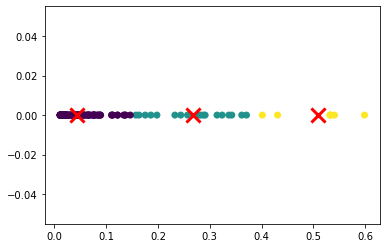

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = final_dict


values = list(data.values())


X = np.array(values).reshape(-1, 1)


kmeans = KMeans(n_clusters=3, random_state=0).fit(X)


labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(X, np.zeros_like(X), c=labels, cmap='viridis')
plt.scatter(centers, np.zeros_like(centers), marker='x', color='r', s=200, linewidths=3)


plt.show()


/home/abhimvp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


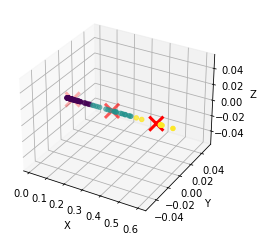

In [125]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

data = final_dict

# Extract the values from the dictionary
values = list(data.values())

# Reshape the data into the format expected by KMeans
X = np.array(values).reshape(-1, 1)

# Specify the number of clusters (k) and fit the model to the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Extract the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points and cluster centers
ax.scatter(X, np.zeros_like(X), np.zeros_like(X), c=labels, cmap='viridis')
ax.scatter(centers, np.zeros_like(centers), np.zeros_like(centers), marker='x', color='r', s=200, linewidths=3)

# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

# Write the cluster labels to a new CSV file
with open('output_eigen.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['#index', 'cluster'])
    for i, label in enumerate(labels):
        writer.writerow([list(data.keys())[i], label])


In [127]:
sorted(final_dict.items(),key=lambda x :x[1],reverse=True)

[('#index 1662904', 0.5990322369034582),
 ('#index 352005', 0.5409594661772046),
 ('#index 161224', 0.5326238801069415),
 ('#index 810898', 0.5326238801069415),
 ('#index 1074379', 0.5326238801069415),
 ('#index 1351625', 0.4310641081600055),
 ('#index 458128', 0.4015573797741732),
 ('#index 1336062', 0.37087609156407464),
 ('#index 908286', 0.3618398819900377),
 ('#index 115649', 0.34255389939583725),
 ('#index 508711', 0.33692206294252375),
 ('#index 193584', 0.3239070159360441),
 ('#index 811246', 0.3140281613560362),
 ('#index 37571', 0.29105441756305706),
 ('#index 231369', 0.28789813280673504),
 ('#index 561862', 0.28250492367152535),
 ('#index 555493', 0.2776481658556255),
 ('#index 502770', 0.25714414721295775),
 ('#index 99694', 0.2439313949780673),
 ('#index 580315', 0.23264547145087383),
 ('#index 1576233', 0.1979082853807434),
 ('#index 1528484', 0.18622292192821852),
 ('#index 404044', 0.17531192864985914),
 ('#index 1647372', 0.16328378329286364),
 ('#index 1704171', 0.15